# Machine Learning - Fire Prediction
## Preprocessing
Before performing the training, we must merge, encode, and scale the data. 

### Data Merge
Create three combinations of datasets by merging on date and County: drought and fire; precipitation and fire; and drought, precipitation, and fire. This will allow different combinations of machine learning.

In [1]:
# dependencies
import pandas as pd

# import fire data
fireFile = "./fire_data_clean.csv"
fireData = pd.read_csv(fireFile)
fireData

,Date,County,Duration,AcresBurned
0,2017-10,Shasta,71.0,37.0
1,2013-02,Inyo,5.0,406.0
2,2013-04,San Bernardino,3.0,30.0
3,2013-04,Madera,2.0,274.0
4,2013-05,Tehama,9.0,6965.0
...,...,...,...,...
1795,2021-10,Tehama,2.0,24.0
1796,2021-10,Kings,2.0,447.0
1797,2021-10,Napa,2.0,132.0
1798,2021-10,Trinity,2.0,59.0


In [2]:
fireData["County"].unique()

array(['Shasta', 'Inyo', 'San Bernardino', 'Madera', 'Tehama', 'Napa',
       'Sonoma', 'Riverside', 'San Benito', 'Glenn', 'Kern', 'Ventura',
       'Los Angeles', 'San Luis Obispo', 'San Joaquin', 'San Diego',
       'Santa Barbara', 'Tuolumne', 'Butte', 'Solano', 'Lake', 'Colusa',
       'Merced', 'Alameda', 'Amador', 'Fresno', 'Mariposa', 'Placer',
       'Contra Costa', 'Monterey', 'Modoc', 'Yuba', 'El Dorado',
       'Santa Clara', 'Stanislaus', 'Humboldt', 'Siskiyou', 'Mendocino',
       'Sacramento', 'Calaveras', 'Lassen', 'Plumas', 'Tulare',
       'San Mateo', 'Nevada', 'Orange', 'Yolo', 'Trinity', 'Alpine',
       'Mono', 'Del Norte', 'Sutter', 'Kings', 'Sierra', 'Marin',
       'Santa Cruz', 'Mexico', 'Imperial'], dtype=object)

In [3]:
# import drought data
droughtFile = "./drought_data_clean.csv"
droughtData = pd.read_csv(droughtFile)
droughtData

,Date,County,None,D0,D1,D2,D3,D4
0,2013-01,Alameda,93.754,6.246,0.00,0.000,0.000,0.000
1,2013-01,Alpine,72.382,23.472,4.07,0.082,0.000,0.000
2,2013-01,Amador,99.966,0.034,0.00,0.000,0.000,0.000
3,2013-01,Butte,100.000,0.000,0.00,0.000,0.000,0.000
4,2013-01,Calaveras,84.374,15.062,0.57,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
6201,2021-11,Tulare,0.000,0.000,0.00,0.000,0.000,100.000
6202,2021-11,Tuolumne,0.000,0.000,0.00,0.000,26.792,73.208
6203,2021-11,Ventura,0.000,0.000,1.25,0.000,13.830,84.920
6204,2021-11,Yolo,0.000,0.000,0.00,0.000,40.000,60.000


In [4]:
droughtData["County"].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [5]:
# import precip data
precipFile = "./precip_data_clean.csv"
precipData = pd.read_csv(precipFile)
precipData

,Date,County,Precip
0,2013-01,Alameda,0.81
1,2013-02,Alameda,0.47
2,2013-03,Alameda,0.63
3,2013-04,Alameda,0.69
4,2013-05,Alameda,0.07
...,...,...,...
6143,2021-06,Yuba,0.02
6144,2021-07,Yuba,0.01
6145,2021-08,Yuba,0.00
6146,2021-09,Yuba,0.23


In [6]:
# merge the drought and fire data
droughtMerged = pd.merge(droughtData, fireData, on = ["Date", "County"])
droughtMerged

,Date,County,None,D0,D1,D2,D3,D4,Duration,AcresBurned
0,2013-02,Inyo,0.0,0.000,7.730,92.270,0.0000,0.0000,5.0,406.0
1,2013-04,Madera,0.0,0.000,73.158,26.842,0.0000,0.0000,2.0,274.0
2,2013-04,Napa,0.0,100.000,0.000,0.000,0.0000,0.0000,2.0,75.0
3,2013-04,San Bernardino,0.0,19.532,23.424,57.044,0.0000,0.0000,3.0,30.0
4,2013-05,Glenn,0.0,0.000,100.000,0.000,0.0000,0.0000,5.0,217.0
...,...,...,...,...,...,...,...,...,...,...
1794,2021-10,Modoc,0.0,0.000,0.000,1.140,83.9325,14.9275,2.0,200.0
1795,2021-10,Napa,0.0,0.000,0.000,0.000,0.0750,99.9250,2.0,132.0
1796,2021-10,Tehama,0.0,0.000,0.000,0.000,23.6025,76.3975,2.0,24.0
1797,2021-10,Trinity,0.0,0.000,0.000,0.000,99.9550,0.0450,7.0,80.0


In [7]:
# merge the precipitation and fire data
precipMerged = pd.merge(precipData, fireData, on = ["Date","County"])
precipMerged

,Date,County,Precip,Duration,AcresBurned
0,2013-06,Alameda,0.12,1.0,240.0
1,2013-07,Alameda,0.00,1.0,50.0
2,2013-07,Alameda,0.00,1.0,38.0
3,2015-08,Alameda,0.02,4.0,2700.0
4,2016-06,Alameda,0.00,2.0,211.0
...,...,...,...,...,...
1794,2020-10,Yuba,0.00,1.0,56.0
1795,2021-05,Yuba,0.08,1.0,35.0
1796,2021-06,Yuba,0.02,2.0,150.0
1797,2021-07,Yuba,0.01,3.0,45.0


In [8]:
# merge the drought, precipitation, and fire data
masterMerge = pd.merge(droughtMerged, precipData, on = ["Date","County"])
masterMerge

,Date,County,None,D0,D1,D2,D3,D4,Duration,AcresBurned,Precip
0,2013-02,Inyo,0.0,0.000,7.730,92.270,0.0000,0.0000,5.0,406.0,0.03
1,2013-04,Madera,0.0,0.000,73.158,26.842,0.0000,0.0000,2.0,274.0,0.87
2,2013-04,Napa,0.0,100.000,0.000,0.000,0.0000,0.0000,2.0,75.0,1.05
3,2013-04,San Bernardino,0.0,19.532,23.424,57.044,0.0000,0.0000,3.0,30.0,0.02
4,2013-05,Glenn,0.0,0.000,100.000,0.000,0.0000,0.0000,5.0,217.0,0.31
...,...,...,...,...,...,...,...,...,...,...,...
1794,2021-10,Modoc,0.0,0.000,0.000,1.140,83.9325,14.9275,2.0,200.0,2.88
1795,2021-10,Napa,0.0,0.000,0.000,0.000,0.0750,99.9250,2.0,132.0,8.23
1796,2021-10,Tehama,0.0,0.000,0.000,0.000,23.6025,76.3975,2.0,24.0,7.43
1797,2021-10,Trinity,0.0,0.000,0.000,0.000,99.9550,0.0450,7.0,80.0,8.86


### Data Encoding
#### Drought Data

In [9]:
# check data types
droughtMerged.dtypes

Date            object
County          object
None           float64
D0             float64
D1             float64
D2             float64
D3             float64
D4             float64
Duration       float64
AcresBurned    float64
dtype: object

In [10]:
# find null values
for column in droughtMerged.columns:
    print(f"Column {column} has {droughtMerged[column].isnull().sum()} null values")

Column Date has 0 null values
Column County has 0 null values
Column None has 0 null values
Column D0 has 0 null values
Column D1 has 0 null values
Column D2 has 0 null values
Column D3 has 0 null values
Column D4 has 0 null values
Column Duration has 0 null values
Column AcresBurned has 0 null values


In [11]:
# encode the drought dataframe
droughtML = pd.get_dummies(droughtMerged)
droughtML

,None,D0,D1,D2,D3,D4,Duration,AcresBurned,Date_2013-02,Date_2013-04,...,County_Sonoma,County_Stanislaus,County_Sutter,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
0,0.0,0.000,7.730,92.270,0.0000,0.0000,5.0,406.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.000,73.158,26.842,0.0000,0.0000,2.0,274.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,100.000,0.000,0.000,0.0000,0.0000,2.0,75.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,19.532,23.424,57.044,0.0000,0.0000,3.0,30.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.000,100.000,0.000,0.0000,0.0000,5.0,217.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.0,0.000,0.000,1.140,83.9325,14.9275,2.0,200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1795,0.0,0.000,0.000,0.000,0.0750,99.9250,2.0,132.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,0.0,0.000,0.000,0.000,23.6025,76.3975,2.0,24.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1797,0.0,0.000,0.000,0.000,99.9550,0.0450,7.0,80.0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Precipitation Data

In [12]:
# check data types
precipMerged.dtypes

Date            object
County          object
Precip         float64
Duration       float64
AcresBurned    float64
dtype: object

In [13]:
# find null values
for column in precipMerged.columns:
    print(f"Column {column} has {precipMerged[column].isnull().sum()} null values")

Column Date has 0 null values
Column County has 0 null values
Column Precip has 0 null values
Column Duration has 0 null values
Column AcresBurned has 0 null values


In [14]:
# encode the precipitation dataframe
precipML = pd.get_dummies(precipMerged)
precipML

,Precip,Duration,AcresBurned,Date_2013-02,Date_2013-04,Date_2013-05,Date_2013-06,Date_2013-07,Date_2013-08,Date_2013-09,...,County_Sonoma,County_Stanislaus,County_Sutter,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
0,0.12,1.0,240.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,1.0,50.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.00,1.0,38.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.02,4.0,2700.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.00,2.0,211.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.00,1.0,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1795,0.08,1.0,35.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1796,0.02,2.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1797,0.01,3.0,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Drought & Precipitation Data

In [15]:
# check the data types
masterMerge.dtypes

Date            object
County          object
None           float64
D0             float64
D1             float64
D2             float64
D3             float64
D4             float64
Duration       float64
AcresBurned    float64
Precip         float64
dtype: object

In [16]:
# find null values
for column in masterMerge.columns:
    print(f"Column {column} has {masterMerge[column].isnull().sum()} null values")


Column Date has 0 null values
Column County has 0 null values
Column None has 0 null values
Column D0 has 0 null values
Column D1 has 0 null values
Column D2 has 0 null values
Column D3 has 0 null values
Column D4 has 0 null values
Column Duration has 0 null values
Column AcresBurned has 0 null values
Column Precip has 0 null values


In [17]:
# encode the drought + precipitation dataframe
masterML = pd.get_dummies(masterMerge)
masterML

,None,D0,D1,D2,D3,D4,Duration,AcresBurned,Precip,Date_2013-02,...,County_Sonoma,County_Stanislaus,County_Sutter,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
0,0.0,0.000,7.730,92.270,0.0000,0.0000,5.0,406.0,0.03,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.000,73.158,26.842,0.0000,0.0000,2.0,274.0,0.87,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,100.000,0.000,0.000,0.0000,0.0000,2.0,75.0,1.05,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,19.532,23.424,57.044,0.0000,0.0000,3.0,30.0,0.02,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.000,100.000,0.000,0.0000,0.0000,5.0,217.0,0.31,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.0,0.000,0.000,1.140,83.9325,14.9275,2.0,200.0,2.88,0,...,0,0,0,0,0,0,0,0,0,0
1795,0.0,0.000,0.000,0.000,0.0750,99.9250,2.0,132.0,8.23,0,...,0,0,0,0,0,0,0,0,0,0
1796,0.0,0.000,0.000,0.000,23.6025,76.3975,2.0,24.0,7.43,0,...,0,0,0,1,0,0,0,0,0,0
1797,0.0,0.000,0.000,0.000,99.9550,0.0450,7.0,80.0,8.86,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
masterML.drop(columns='None')

,D0,D1,D2,D3,D4,Duration,AcresBurned,Precip,Date_2013-02,Date_2013-04,...,County_Sonoma,County_Stanislaus,County_Sutter,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
0,0.000,7.730,92.270,0.0000,0.0000,5.0,406.0,0.03,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000,73.158,26.842,0.0000,0.0000,2.0,274.0,0.87,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100.000,0.000,0.000,0.0000,0.0000,2.0,75.0,1.05,0,1,...,0,0,0,0,0,0,0,0,0,0
3,19.532,23.424,57.044,0.0000,0.0000,3.0,30.0,0.02,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000,100.000,0.000,0.0000,0.0000,5.0,217.0,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.000,0.000,1.140,83.9325,14.9275,2.0,200.0,2.88,0,0,...,0,0,0,0,0,0,0,0,0,0
1795,0.000,0.000,0.000,0.0750,99.9250,2.0,132.0,8.23,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,0.000,0.000,0.000,23.6025,76.3975,2.0,24.0,7.43,0,0,...,0,0,0,1,0,0,0,0,0,0
1797,0.000,0.000,0.000,99.9550,0.0450,7.0,80.0,8.86,0,0,...,0,0,0,0,1,0,0,0,0,0


### Data Scaling

In [19]:
#I tried more models than needed for the project requirements, but left
#the best fitting supervised machine learning models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [20]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

In [21]:
df = masterML

## Machine Learning

In [22]:
X = df
y = df["AcresBurned"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.999996767679396

In [25]:
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_train_scaled, y_train)

1.0

In [26]:

df = pd.DataFrame(
    {"actual": y_train, "predicted" :list(reg.predict(X_train_scaled))}
    )

df

,actual,predicted
977,4564.0,4564.0
135,23.0,23.0
1759,639.0,639.0
859,866.0,866.0
1477,1672.0,1672.0
...,...,...
905,281893.0,281893.0
1791,8578.0,8578.0
1096,51.0,51.0
235,38.0,38.0


In [27]:
df = pd.DataFrame(
    {"actual": y_test, "predicted" :list(reg.predict(X_test_scaled)), "net":  list(reg.predict(X_test_scaled) - y_test)}
    )

df

,actual,predicted,net
282,86.0,86.0,8.913048e-11
268,25.0,25.0,1.582521e-10
764,100.0,100.0,-3.274181e-11
1015,63.0,63.0,-6.002665e-11
1347,260.0,260.0,4.365575e-11
...,...,...,...
726,50.0,50.0,3.092282e-11
1098,20.0,20.0,-1.818989e-12
1649,43.0,43.0,-6.730261e-11
464,100.0,100.0,-3.637979e-11


In [28]:
lasso = Lasso().fit(X_train_scaled, y_train)
lasso.score(X_test_scaled, y_test)

0.9999995847881296

# Joseph Testing Plots Below This Cell

In [29]:
print(X_train_scaled.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(1349, 152)
(1349, 152)
(450, 152)
(450,)
(1349,)


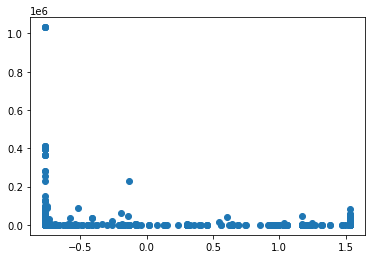

In [30]:
# https://stackoverflow.com/questions/36940182/python-why-does-my-linear-regression-plot-give-me-many-messy-coloured-lines
# ^

"""
I suspect your problem/confusion here is with the dimensions of the problem. My understanding is that you expect to see a line going through the 
points where the line function takes in X and outputs lr.predict(X). You aren't going to see that one line because your X variable has 12 columns 
therefore you have 12 different independent variables.

If you are trying to plot all of them along with your one dependent variable, lr.predict(X), then you are going to need 13 dimensions.
The plot method isn't going to plot that for you. Instead it attempts to draw 12 different lines one for each dimension in X. That's what you are seeing.
"""

plt.scatter(X_train_scaled[:,0], y_train)
# plt.plot(X_train_scaled, reg.predict(X_train_scaled))
plt.show()


# Normalize data - whichever points are closest to 0 | H line chart


# What may be needed is this approach 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

# ALSO - Scikit learn Docs
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [31]:
y_train.values

array([4.5640e+03, 2.3000e+01, 6.3900e+02, ..., 5.1000e+01, 3.8000e+01,
       9.6901e+04])

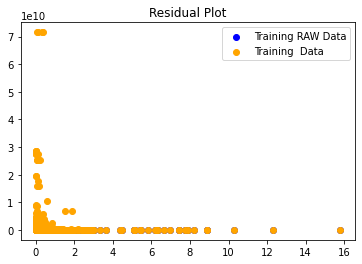

In [32]:
# Plot the residuals for the training and testing data.

### BEGIN SOLUTION
plt.scatter(list(X_train["Precip"]), list(y_train.values), c="blue", label="Training RAW Data")
plt.scatter(list(X_train["Precip"]), reg.predict(X_train), c="orange", label="Training  Data")
plt.legend()
#plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [33]:
reg.predict(X_test)


array([5.97194793e+06, 1.74309192e+06, 6.94244299e+06, 4.37736952e+06,
       1.80344908e+07, 9.09114807e+06, 5.14008392e+06, 1.49147822e+07,
       1.98873629e+09, 3.12966643e+06, 5.20942492e+06, 6.94248151e+06,
       4.86273958e+06, 1.67378764e+06, 2.55165543e+09, 8.41817043e+05,
       6.72099999e+09, 7.92325491e+08, 4.50712249e+07, 5.58145626e+08,
       2.87799208e+07, 2.92163148e+06, 2.22835213e+06, 1.50535238e+07,
       8.88368377e+06, 5.41736388e+06, 6.20558689e+07, 3.75353697e+06,
       1.38748283e+07, 2.37884562e+07, 1.43601614e+07, 2.22838142e+06,
       1.12732320e+08, 1.78266065e+07, 1.60446264e+06, 1.06300291e+10,
       2.78298146e+06, 3.47627746e+06, 5.72030759e+07, 3.12962581e+06,
       8.81428664e+06, 2.71361145e+06, 1.73412203e+07, 2.22632910e+07,
       7.03135350e+05, 4.10016556e+06, 1.01016582e+08, 8.88363530e+06,
       2.29767261e+06, 2.78294719e+06, 4.16938302e+06, 6.88496255e+07,
       3.96163104e+06, 9.80472072e+05, 3.97796953e+08, 1.18850634e+06,
      

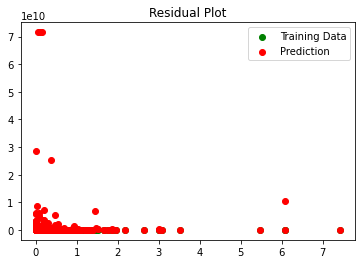

In [35]:
plt.scatter(list(X_test["Precip"]), list(y_test.values), c="Green", label="Training Data")
plt.scatter(list(X_test["Precip"]), lasso.predict(X_test), c="Red", label="Prediction")
plt.legend()
#plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Lasso Model Predictions")
plt.show()